In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
from monty.serialization import loadfn, dumpfn
import json

In [3]:
MODEL = "uma"

In [4]:
supercell_size2 = 10.1
supercell_size = 10

In [5]:
complete_energies = loadfn(f'../data/{MODEL}/{MODEL}_doped_defect_energies_{supercell_size}A.json')

In [6]:
complete_energies2 = loadfn(f'../data/{MODEL}/{MODEL}_doped_defect_energies_{supercell_size2}A.json')

In [23]:
complete_energies['mp-4417']['competing phases']['chemical potentials']['limits']

{'Al2(SO4)3-S-Al2O3-CrS2': {'Al': -8.55262,
  'S': -4.13813,
  'O': -6.76765,
  'Cr': -11.13676},
 'Al2(SO4)3-O2-Al2O3-Cr5O12': {'Al': -12.25936,
  'S': -11.5516,
  'O': -4.2965,
  'Cr': -13.73103},
 'Al2(SO4)3-SO3-O2-Cr2(SO4)3': {'Al': -14.0578,
  'S': -10.35263,
  'O': -4.2965,
  'Cr': -15.07738},
 'SO2-Al2(SO4)3-S-CrS2': {'Al': -9.81544,
  'S': -4.13813,
  'O': -6.5572,
  'Cr': -11.13676},
 'SO2-Al2(SO4)3-SO3-Cr2(SO4)3': {'Al': -11.5181,
  'S': -5.27323,
  'O': -5.98963,
  'Cr': -12.53763}}

Defect formation energy = energy of defect supercell *min energy site* + Al atoms chem potential - non defect supercell - Cr atom chem potential

In [7]:
for key in complete_energies.keys():
    complete_energies[key]['defect formation energy'] = {}
    defect_supercell_e = complete_energies2[key]['minimum energy site']['energy']
    supercell_e = complete_energies2[key]['supercell']['energy'] # pristine supercell
    formation_energy = {}
    for key1 in complete_energies[key]['competing phases']['chemical potentials']['limits'].keys():
        defect_energy = defect_supercell_e + complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Al'] - supercell_e - complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Cr']
        formation_energy[key1] = defect_energy
    complete_energies[key]['defect formation energy'] = formation_energy

In [8]:
dumpfn(complete_energies, f'../data/{MODEL}/{MODEL}_calculated_defect_formation_energies_{supercell_size2}A.json')

In [9]:
complete_energies = loadfn(f'../data/{MODEL}/{MODEL}_calculated_defect_formation_energies_{supercell_size2}A.json')

In [14]:
for key in complete_energies.keys():
    pretty = json.dumps(complete_energies[key]['defect formation energy'], indent=1)
    print(pretty)

{
 "Al(PO3)3-AlPO4-P-CrP4": 2.2218420193764477,
 "Al(PO3)3-P2O5-P-CrP4": 0.1779020193766545,
 "Al(PO3)3-AlPO4-O2-Cr(PO3)3": 0.07084201937649226,
 "Al(PO3)3-P2O5-O2-Cr(PO3)3": 0.07087201937654264
}
{
 "LiAl3-LiAlO2-Al-Al45Cr7": 5.64609466586081,
 "LiAl3-LiAlO2-LiAl-Al45Cr7": 5.59039466586076,
 "LiAl5O8-LiAlO2-Al-Al45Cr7": 5.64609466586081,
 "LiAl5O8-LiAlO2-LiO8-Li2CrO4": 0.6002446658607816,
 "Li3Al2-LiAlO2-LiAl-Al3Cr": 4.771414665860847,
 "Li3Al2-Li5AlO4-LiAlO2-AlCr2": 4.757984665860855,
 "Li2O2-LiAlO2-LiO8-Li2CrO4": 0.9973846658608085,
 "Li2O2-Li5AlO4-LiAlO2-Li2CrO4": 0.9378646658608041
}
{
 "AlClO-Cl2-Al2O3-CrCl3": 2.8106677884190017,
 "AlClO-AlCl3-Cl2-CrCl3": 2.8798877884190315,
 "AlClO-Al-Al2O3-Al45Cr7": 5.229857788419006,
 "AlClO-AlCl3-Al-Al45Cr7": 5.229857788419006
}
{
 "SmAlO3-SmAl3-SmAl2-AlCr2": 4.715655847501402,
 "SmAlO3-Sm4Al2O9-SmAl2-AlCr2": 4.685085847501471,
 "SmAlO3-SmAl3-Sm3Al5O12-AlCr2": 4.7534958475014815,
 "SmAlO3-Sm3Al5O12-O2-SmCrO4": 0.8850558475014694,
 "SmAlO3-Sm4

In [21]:
#plot of min that includes negatives
mfe = []
compounds = []
for key, val in complete_energies.items():
    if key != 'mp-755882':
        compounds.append(complete_energies[key]['formula'])
        min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
        min_value = complete_energies[key]['defect formation energy'][min_key]
        mfe.append(val['defect formation energy'][min_key])

In [15]:
import numpy as np
import matplotlib.pyplot as plt

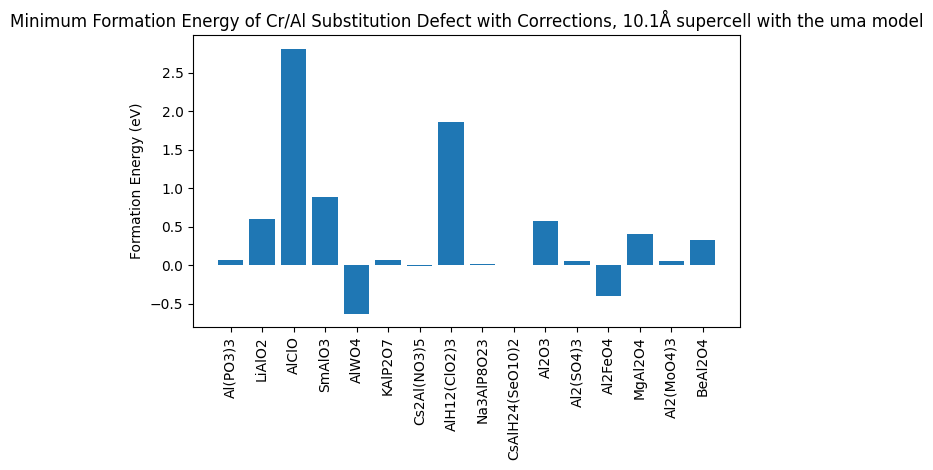

In [22]:
fig, ax = plt.subplots()
bars = ax.bar(compounds, mfe)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title(f"Minimum Formation Energy of Cr/Al Substitution Defect with Corrections, {supercell_size2}Å supercell with the {MODEL} model")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig(f"../figures/{MODEL}_corrections_min_defect_formation_energies_{supercell_size}A.png", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
print(mfe)

[0.07079253695435028, 1.4417894070716102, 5.6179620059486695, 1.5720253299231324, 0.0654959109778126, 0.06911853793168099, -0.008959831209626401, 0.09854201693463871, 0.015052558927360238, 0.0875865481843956, 1.1943035867593679, 0.04885524874622682, -0.04602842495971693, 1.0717511404700666, 0.05428191561624374, 0.9446785965244615]


In [12]:
#plot of min that includes negatives
mfe_2 = []
compounds_2 = []
for key, val in complete_energies.items():
    if val['competing phases']['unstable'] == False:
        compounds_2.append(val['formula'])
        min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
        min_value = val['defect formation energy'][min_key]
        mfe_2.append(val['defect formation energy'][min_key])

KeyError: 'defect formation energy'

In [57]:
print(len(mfe), len(compounds_2))

17 14


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (6,).

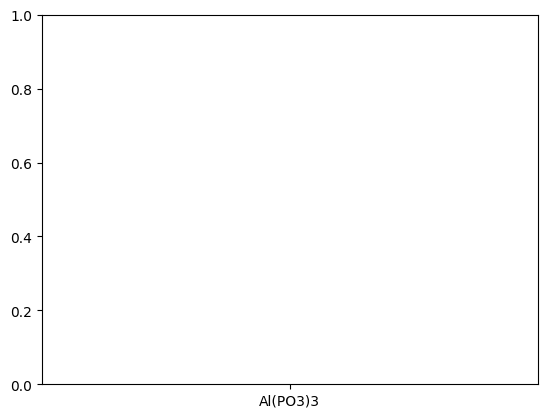

In [13]:
fig, ax = plt.subplots()
bars = ax.bar(compounds_2, mfe_2)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title(f"Minimum Formation Energy of Cr/Al Substitution Defect with {Model} Model")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"../figures/{MODEL}_stable_min_defect_formation_energies_{supercell_size}A.png", dpi=300, bbox_inches='tight')
plt.show()

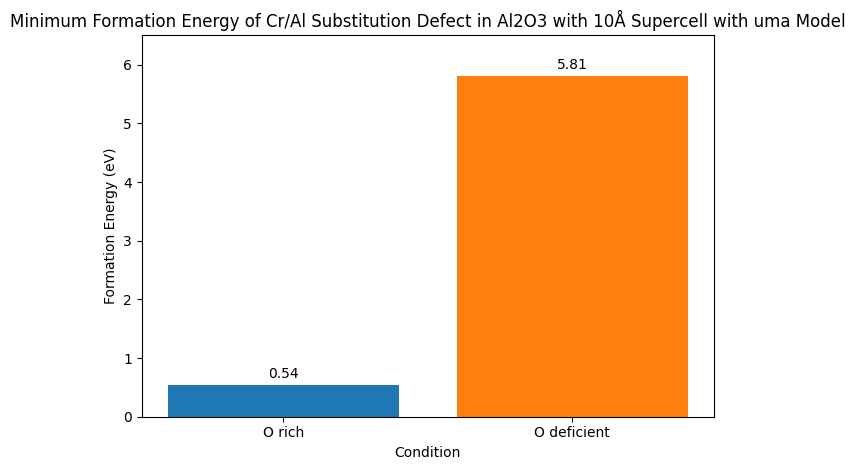

In [14]:
import matplotlib.pyplot as plt

# Data
conditions = ['O rich', 'O deficient']
formation_energies = [0.5400993289464999, 5.805219328946514]

# Set up the plot
fig, ax = plt.subplots()

# Plot bar chart
bars = ax.bar(conditions, formation_energies, color=['tab:blue', 'tab:orange'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
# Formatting
ax.set_title(f"Minimum Formation Energy of Cr/Al Substitution Defect in Al2O3 with {supercell_size}Å Supercell with {MODEL} Model")
ax.set_ylabel("Formation Energy (eV)")
ax.set_xlabel("Condition")

plt.tight_layout()
plt.ylim(0,6.5)
# Save and show
plt.savefig(f"../figures/{MODEL}_Al2O3_defect_formation_energies_{supercell_size}A.png", dpi=300, bbox_inches='tight')
plt.show()
